In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import ptitprince
import seaborn as sns

In [2]:
fpath = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/processed/ses-level_beta_maps_ICC.pkl'
with open(fpath, 'rb') as f:
    datadict = pickle.load(f)

condlist = np.unique(datadict['cond'])
subjlist = np.unique(datadict['subj'])
n_runs = len(datadict['fnames'])

corr_r2 = []
corr_cond = []
corr_intera = []

# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('inter-subject')


# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('inter-subject')

plot_df = pd.DataFrame({'r2':corr_r2,
                        'event': corr_cond,
                        'comparison': corr_intera})


KeyError: ('inter-subject', 'cue')

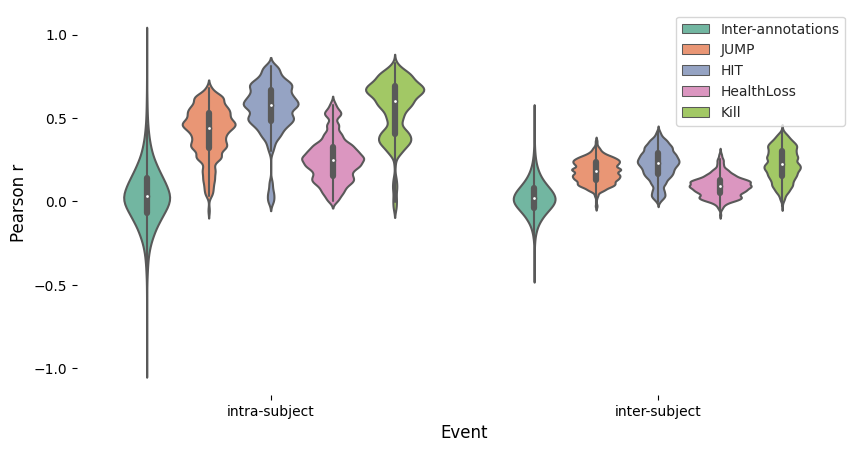

In [4]:
from statannotations.Annotator import Annotator
import scipy

dx="comparison"; dy="r2"; dhue = "event"; ort="v"; pal = "Set2"; sigma = .15
hue_order = ['Inter-annotations', 'JUMP', 'HIT', 'HealthLoss', 'Kill']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, hue = dhue, 
               hue_order=hue_order,
               data = plot_df, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
for comp in np.unique(plot_df.comparison):
    for event in np.unique(plot_df.event):
        if event != 'Inter-annotations':
            pairs.append(((comp, event), (comp, 'Inter-annotations')))

annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, hue_order=hue_order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='bonf')
annotator.apply_and_annotate();


In [14]:
df = plot_df.groupby(['comparison', 'event']).describe().reset_index()

In [22]:
inter_subject_df_sorted

comparison              event         r2                                \
                                          count      mean       std       min   
24  inter-subject  reward-punishment     1393.0  0.010142  0.076922 -0.221420   
19  inter-subject  punishment-reward     1393.0  0.010142  0.076922 -0.221420   
2   inter-subject  Inter-annotations  1464859.0  0.022446  0.100231 -0.453364   
22  inter-subject   relational-match     1304.0  0.027537  0.082974 -0.260392   
10  inter-subject      left_foot-avg     1437.0  0.029741  0.085620 -0.295673   
12  inter-subject      left_hand-avg     1437.0  0.034663  0.109193 -0.287510   
17  inter-subject      mental-random     1261.0  0.037597  0.089562 -0.312484   
28  inter-subject     right_hand-avg     1437.0  0.054058  0.098567 -0.230677   
26  inter-subject     right_foot-avg     1437.0  0.056047  0.087396 -0.274507   
25  inter-subject         right_foot     1437.0  0.072284  0.082560 -0.212254   
9   inter-subject          left_foot     1437.0  0.085336  0.079292 -0.216561   
1   inter-subject         HealthLoss      688.0  0.092888  0.063299 -0.081583   
33  inter-subject             tongue     1437.0  0.099175  0.099110 -0.221682   
11  inter-subject          left_hand     1437.0  0.099295  0.091802 -0.247967   
29  inter-subject              shape     1390.0  0.101297  0.077762 -0.169678   
34  inter-subject         tongue-avg     1437.0  0.113423  0.167863 -0.278919   
30  inter-subject         shape-face     1390.0  0.117552  0.090927 -0.189817   
8   inter-subject         face-shape     1390.0  0.117552  0.090927 -0.189817   
27  inter-subject         right_hand     1437.0  0.122920  0.081171 -0.213806   
5   inter-subject                cue     1437.0  0.123652  0.082091 -0.169658   
14  inter-subject               math     1390.0  0.151010  0.073138 -0.111773   
7   inter-subject               face     1390.0  0.160478  0.088035 -0.181845   
6   inter-subject   effects_interest     1437.0  0.175772  0.098989 -0.128669   
20  inter-subject             random     1261.0  0.176011  0.118829 -0.202852   
18  inter-subject         punishment     1393.0  0.181759  0.094252 -0.153675   
3   inter-subject               JUMP      793.0  0.181768  0.068131 -0.031443   
23  inter-subject             reward     1393.0  0.182569  0.110171 -0.202825   
0   inter-subject                HIT      793.0  0.222690  0.095038 -0.002757   
4   inter-subject               Kill      793.0  0.224016  0.096918 -0.024415   
31  inter-subject              story     1390.0  0.224976  0.078979 -0.032838   
16  inter-subject             mental     1261.0  0.246813  0.131272 -0.202492   
32  inter-subject         story-math     1390.0  0.257334  0.083781 -0.192462   
15  inter-subject         math-story     1390.0  0.257334  0.083781 -0.192462   
13  inter-subject              match     1304.0  0.328770  0.091365  0.026130   
21  inter-subject         relational     1304.0  0.373649  0.089278  0.038632   

                                            
         25%       50%       75%       max  
24 -0.044300  0.009471  0.061952  0.348667  
19 -0.044300  0.009471  0.061952  0.348667  
2  -0.040708  0.019511  0.082303  0.549921  
22 -0.023245  0.031636  0.080760  0.300717  
10 -0.027401  0.032563  0.090680  0.289432  
12 -0.040010  0.039055  0.113798  0.337542  
17 -0.021037  0.037117  0.097064  0.315133  
28 -0.013014  0.056205  0.118753  0.320401  
26 -0.005368  0.057733  0.118981  0.293540  
25  0.019921  0.077056  0.126656  0.304875  
9   0.032901  0.087645  0.137392  0.313112  
1   0.048582  0.092301  0.131136  0.299593  
33  0.027704  0.104275  0.171360  0.371418  
11  0.037671  0.102345  0.160775  0.360187  
29  0.047927  0.102616  0.155219  0.333126  
34 -0.040817  0.138857  0.263855  0.428233  
30  0.055611  0.118567  0.179977  0.380313  
8   0.055611  0.118567  0.179977  0.380313  
27  0.070962  0.122382  0.174372  0.385026  
5   0.068260  0.123933  0.177924  0.353549  
14  0.104926  0.153

14054      0.306440
14055      0.134445
14056      0.367480
14057      0.266700
14058      0.350290
             ...   
2015023   -0.032261
2015024    0.044143
2015025    0.173435
2015026   -0.058862
2015027    0.158183
Name: r2, Length: 1509557, dtype: float64

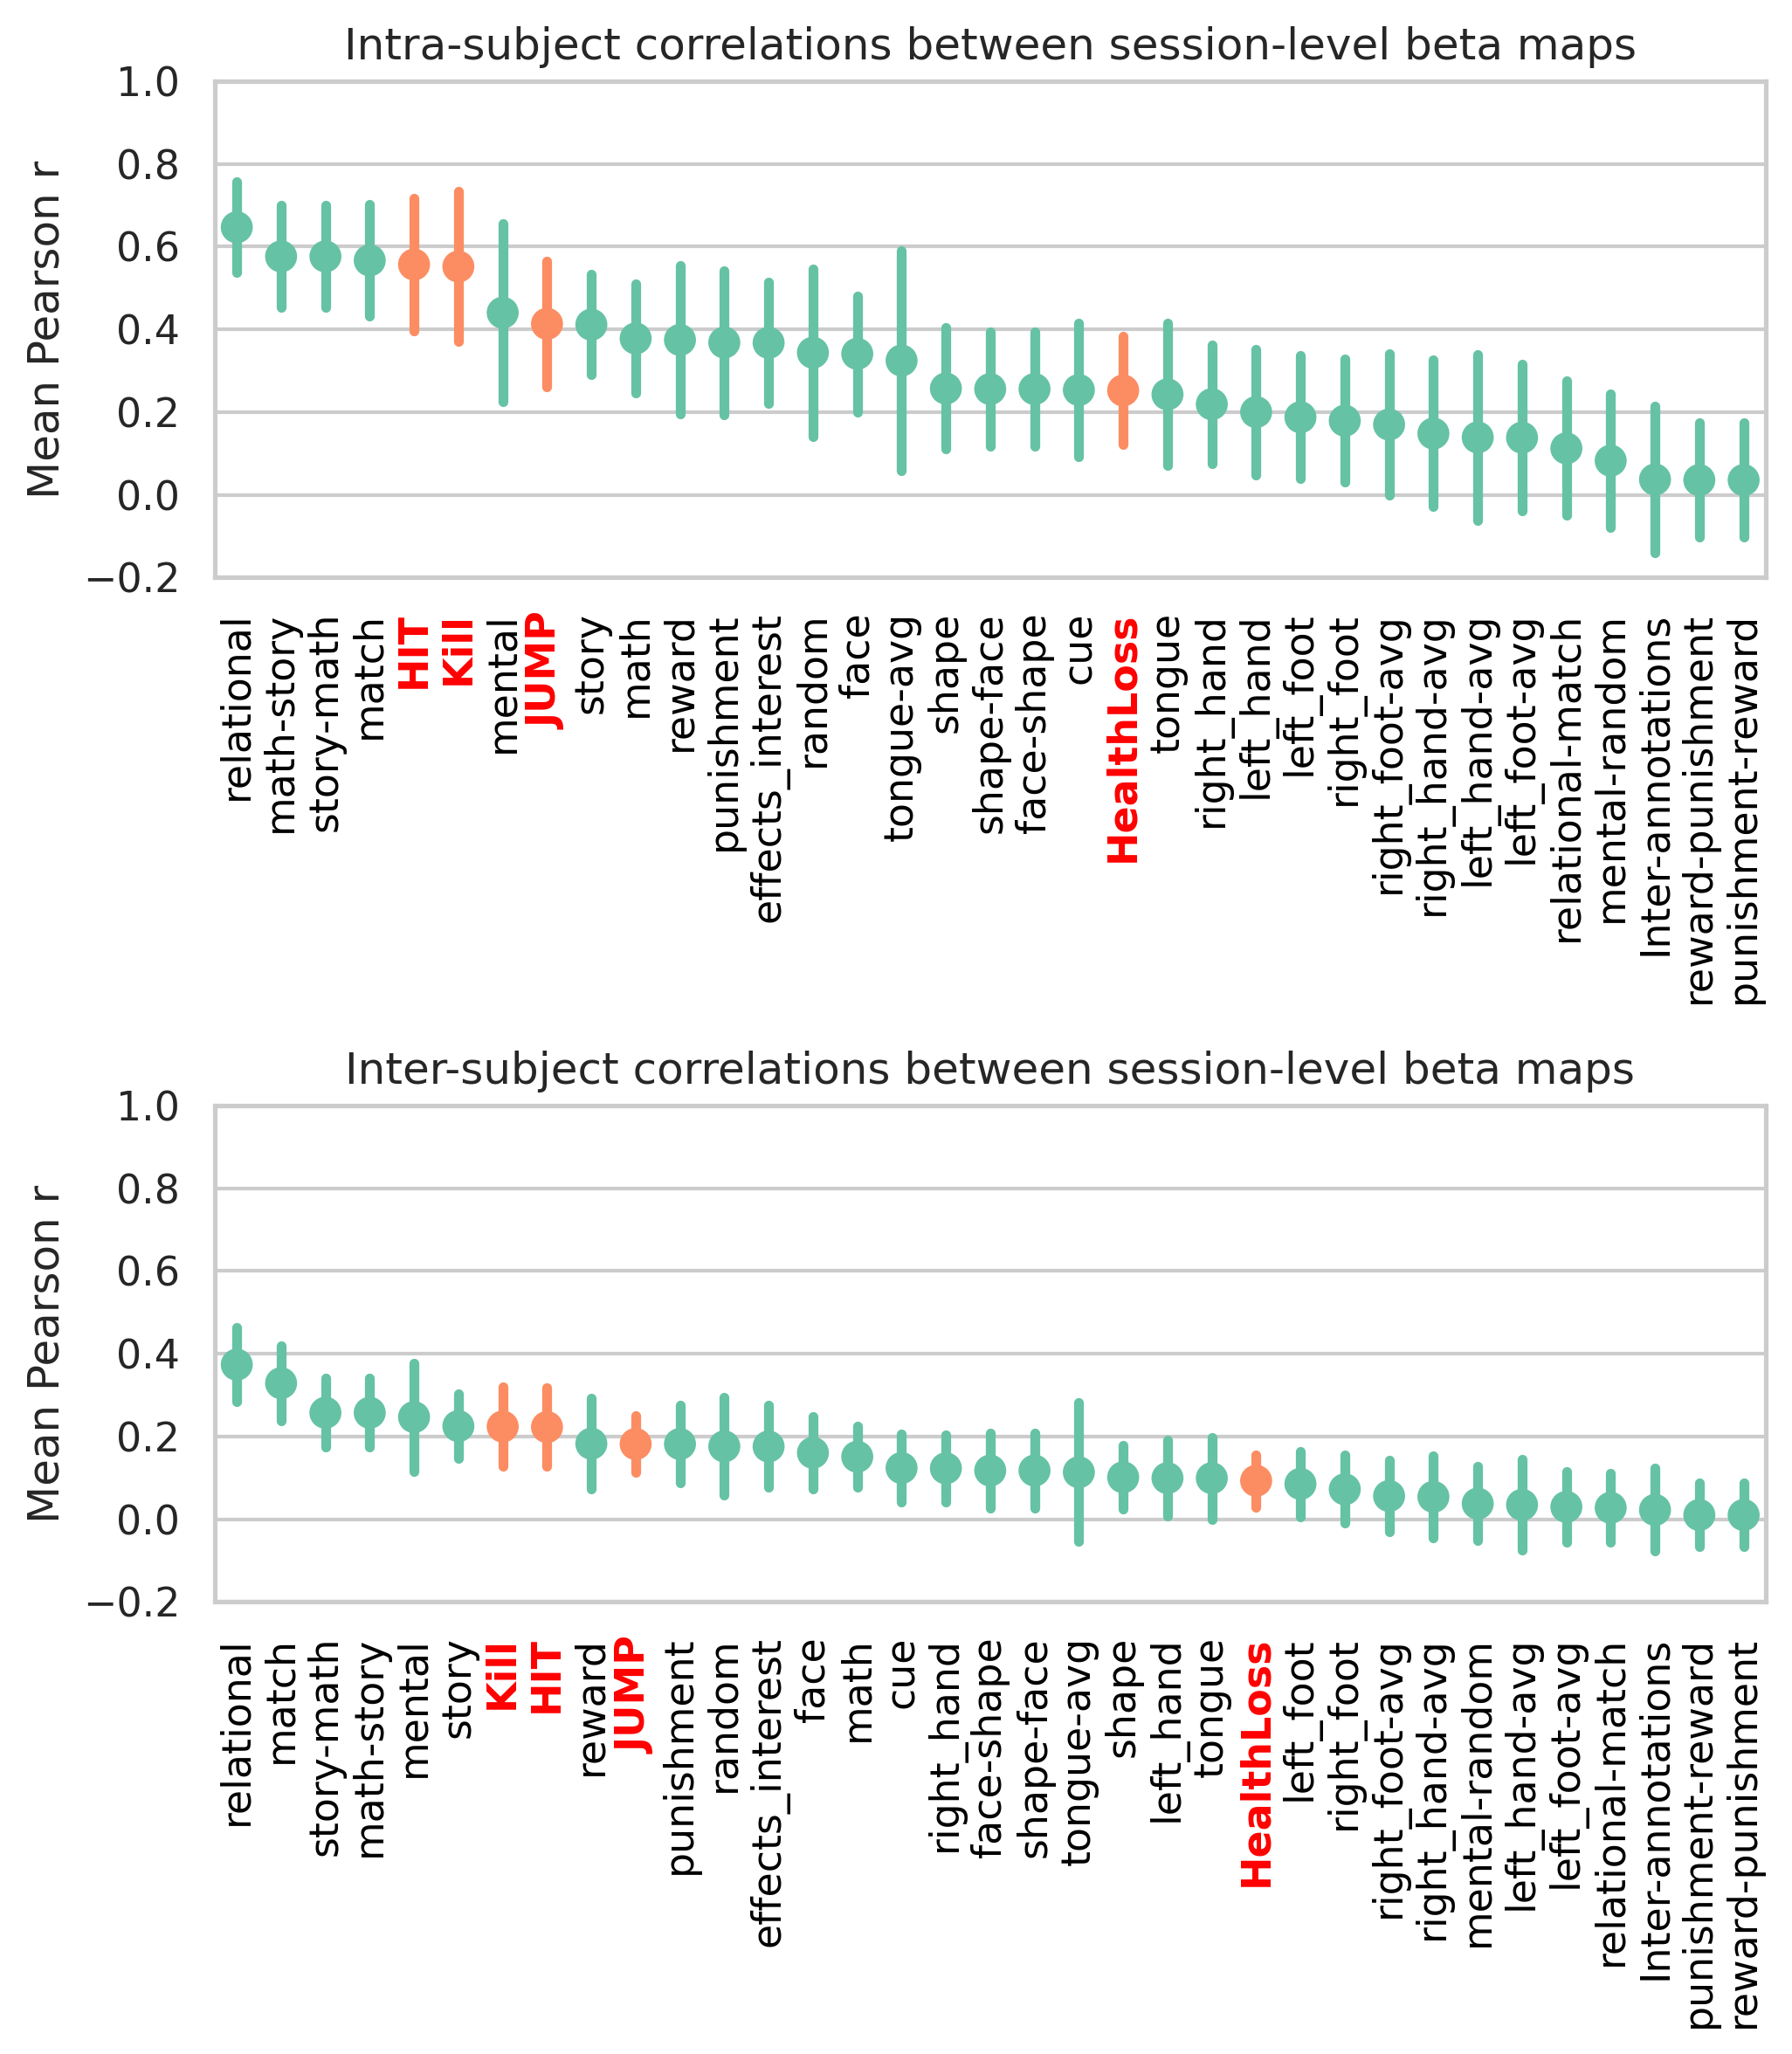

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'r2' is numeric and drop NaNs
plot_df['r2'] = pd.to_numeric(plot_df['r2'], errors='coerce')
plot_df = plot_df.dropna(subset=['r2'])

# Define events to highlight
highlight_events = ['Kill', 'HIT', 'JUMP', 'HealthLoss']

# Get colors from Seaborn's "Set2" palette
palette = sns.color_palette("Set2")
highlight_color = palette[1]  # Second color
normal_color = palette[0]     # First color

# Function to create a palette dictionary
def create_palette(events):
    return {event: highlight_color if event in highlight_events else normal_color for event in events}

# Separate data into inter-subject and intra-subject
inter_df = plot_df[plot_df['comparison'] == 'inter-subject']
intra_df = plot_df[plot_df['comparison'] == 'intra-subject']

# Function to get sorted events based on mean 'r2'
def get_sorted_events(df):
    event_means = df.groupby('event')['r2'].mean().reset_index()
    sorted_events = event_means.sort_values('r2', ascending=False)['event'].tolist()
    return sorted_events

# Get sorted events and palettes
inter_events = get_sorted_events(inter_df)
intra_events = get_sorted_events(intra_df)
inter_palette = create_palette(inter_events)
intra_palette = create_palette(intra_events)

# Plot settings
sns.set(style="whitegrid", font_scale=1)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 8), dpi=300)

# Function to set x-tick labels with bold and red font for highlighted events
def set_xtick_labels(ax, events):
    labels = ax.get_xticklabels()
    for label in labels:
        event = label.get_text()
        if event in highlight_events:
            label.set_color('red')
            label.set_fontweight('bold')
        else:
            label.set_color('black')

# Plot inter-subject data
sns.pointplot(
    data=inter_df,
    x='event',
    y='r2',
    palette=inter_palette,
    ax=axes[1],
    order=inter_events,
    ci='sd'
)
axes[1].set_title('Inter-subject correlations between session-level beta maps')
axes[1].set_xlabel('')
axes[1].set_ylabel('Mean Pearson r')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_ylim(-0.2, 1)
set_xtick_labels(axes[1], inter_events)

# Plot intra-subject data
sns.pointplot(
    data=intra_df,
    x='event',
    y='r2',
    palette=intra_palette,
    ax=axes[0],
    order=intra_events,
    ci='sd'
)
axes[0].set_title('Intra-subject correlations between session-level beta maps')
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean Pearson r')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_ylim(-0.2, 1)
set_xtick_labels(axes[0], intra_events)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


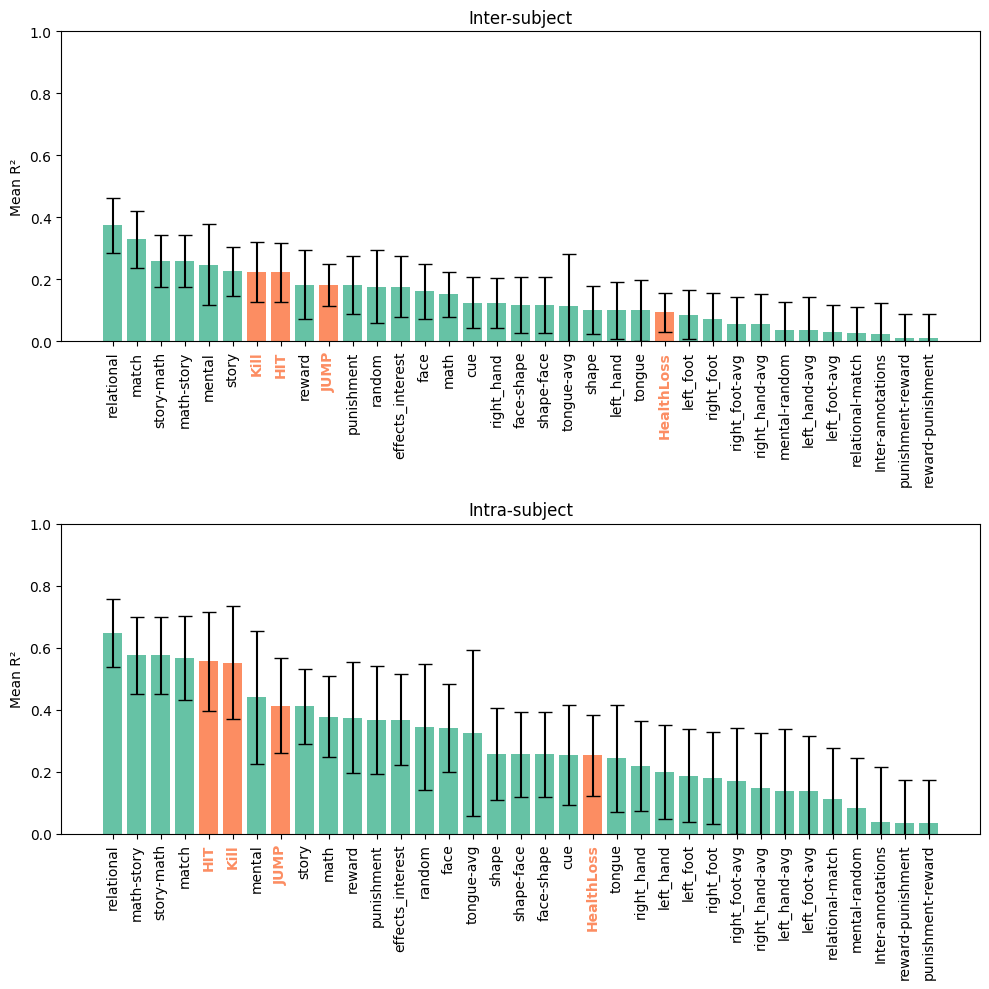

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is properly formatted and contains the necessary data
df = plot_df.groupby(['comparison', 'event']).describe().reset_index()

# Separate inter-subject and intra-subject data
inter_subject_df = df[df['comparison'] == 'inter-subject']
intra_subject_df = df[df['comparison'] == 'intra-subject']

# Sort by mean in descending order
inter_subject_df_sorted = inter_subject_df.sort_values(('r2', 'mean'), ascending=False)
intra_subject_df_sorted = intra_subject_df.sort_values(('r2', 'mean'), ascending=False)

# Define events to highlight
highlight_events = ['Kill', 'HIT', 'JUMP', 'HealthLoss']

# Get colors from seaborn's "Set2" palette
palette = sns.color_palette("Set2")
highlight_color = palette[1]  # Second color in "Set2"
normal_color = palette[0]     # First color in "Set2"

# Define a function to plot the bar charts
def plot_bar(ax, data, title):
    # Create a list of colors for bars
    colors = [highlight_color if event in highlight_events else normal_color for event in data['event']]
    # Plot bars with specified colors
    ax.bar(data['event'], data[('r2', 'mean')], yerr=data[('r2', 'std')], capsize=5, color=colors)
    # Set x-tick labels and their colors
    labels = ax.set_xticklabels(data['event'], rotation=90)
    for label, event in zip(labels, data['event']):
        if event in highlight_events:
            label.set_color(highlight_color)
            label.set_fontweight('bold')
        else:
            label.set_color('black')
    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.set_ylabel('Mean R²')

# Create a multipanel plot with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot inter-subject data
plot_bar(axes[0], inter_subject_df_sorted, 'Inter-subject')

# Plot intra-subject data
plot_bar(axes[1], intra_subject_df_sorted, 'Intra-subject')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


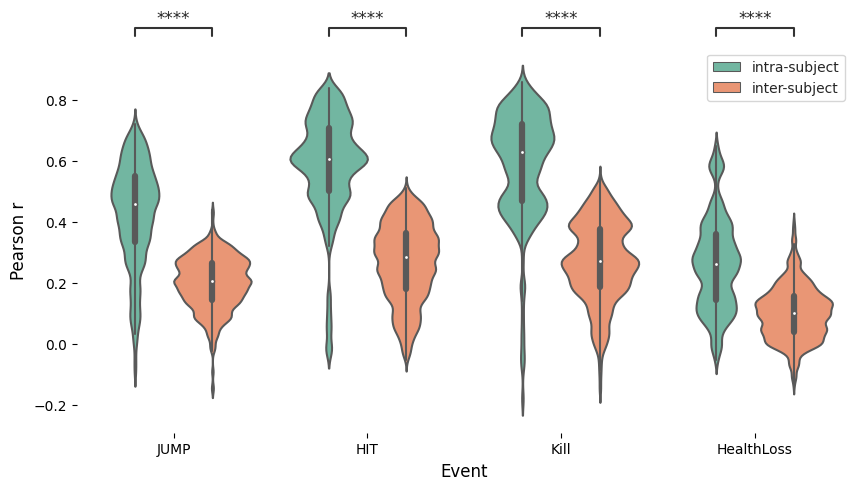

In [3]:
from statannotations.Annotator import Annotator
import scipy

dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, hue = dhue, 
               order=order,
               data = plot_df, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


In [4]:
plot_df_intra = plot_df[plot_df.comparison == 'intra-subject']
plot_df_inter = plot_df[plot_df.comparison == 'inter-subject']

,r2,event,comparison
0,0.661470,HIT,intra-subject
1,-0.004476,HIT,intra-subject
2,0.735708,HIT,intra-subject
3,0.414770,HIT,intra-subject
4,0.639137,HIT,intra-subject
...,...,...,...
15748,0.092798,Inter-annotations,inter-subject
15749,0.137961,Inter-annotations,inter-subject
15750,-0.000654,Inter-annotations,inter-subject
15751,0.192476,Inter-annotations,inter-subject


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid 

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


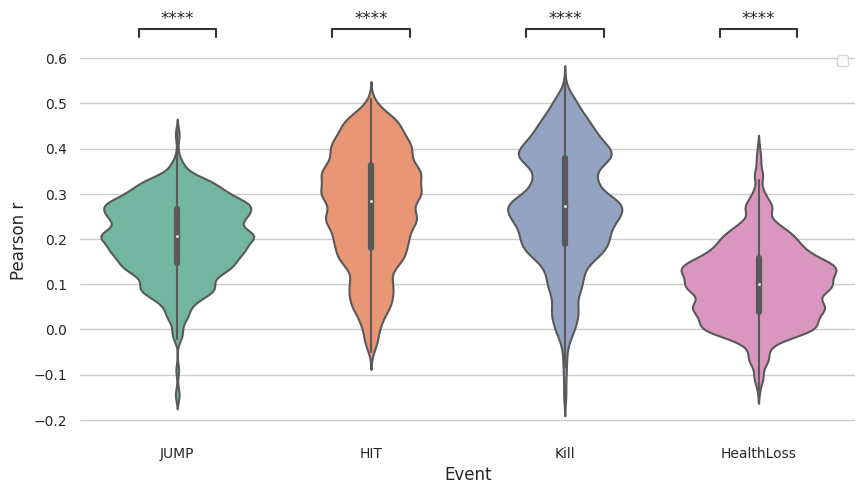

In [7]:
### Split version
## Inter

from statannotations.Annotator import Annotator
import scipy


dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, 
               order=order,
               data = plot_df_inter, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid 

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


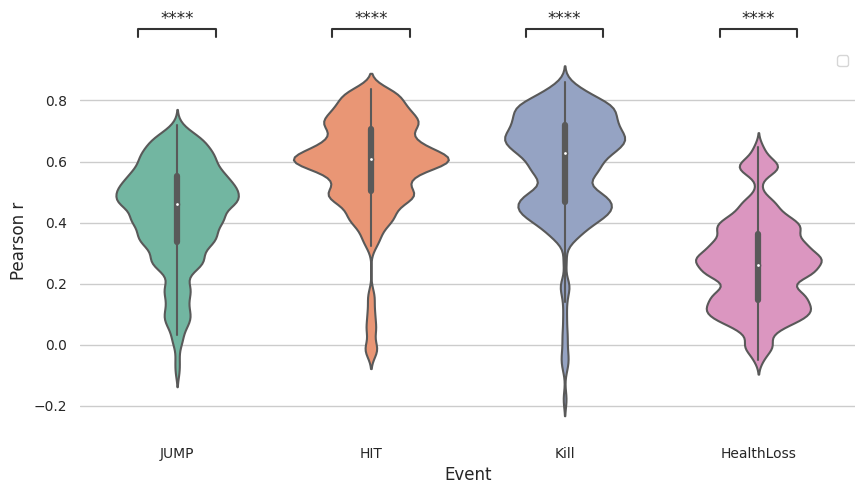

In [8]:
### Split version
## Intra

from statannotations.Annotator import Annotator
import scipy


dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, 
               order=order,
               data = plot_df_intra, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


Text(0, 0.5, 'Pearson r')

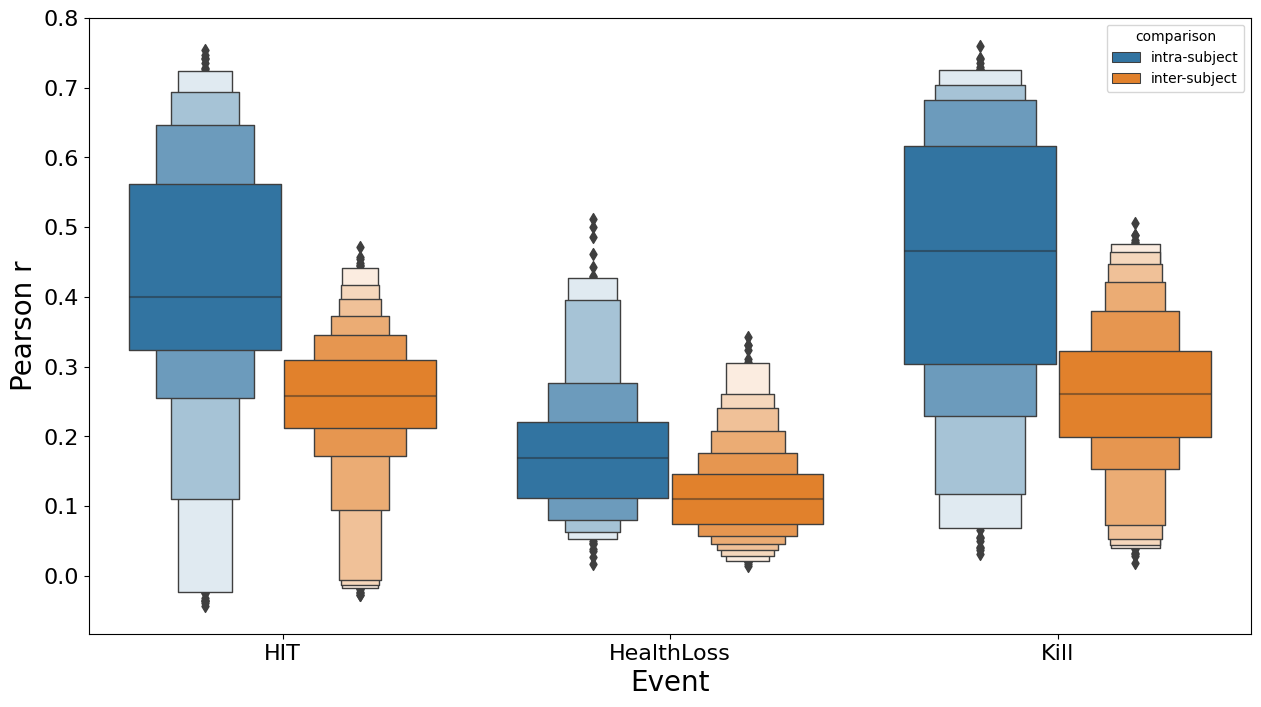

In [9]:
import seaborn as sbn
fig, ax = plt.subplots(figsize=(15,8))
sbn.boxenplot(data=plot_df, x='event', y='r2', hue='comparison', scale='area')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_xlabel('Event', fontsize=20)
ax.set_ylabel('Pearson r', fontsize=20)

/home/hyruuk/mambaforge/envs/shinobi2/lib/python3.8/site-packages/ptitprince/PtitPrince.py:64: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  for h in self.plot_hues[i]], np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

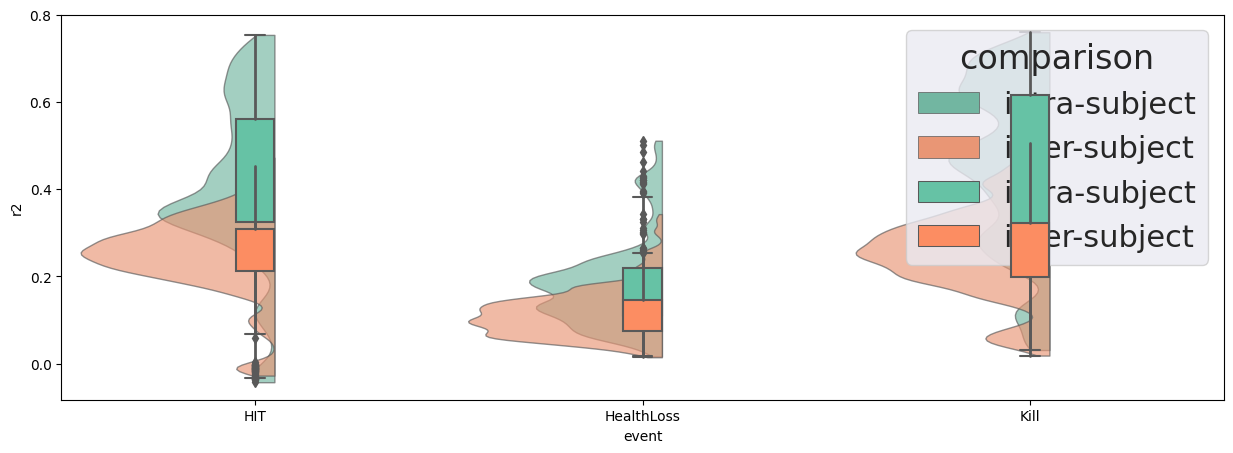

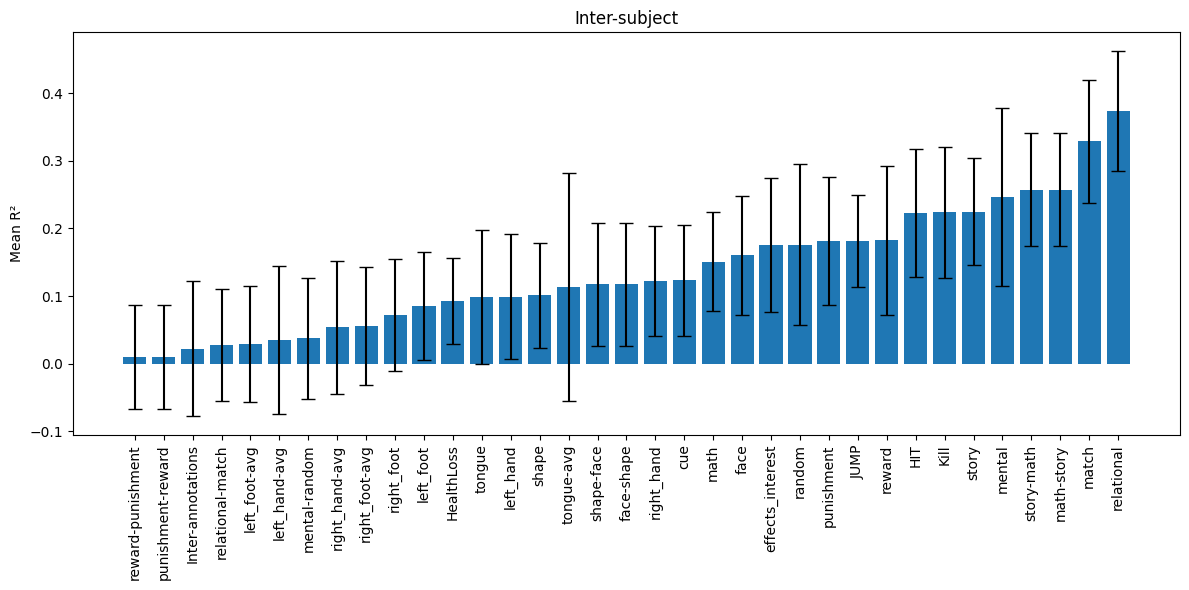

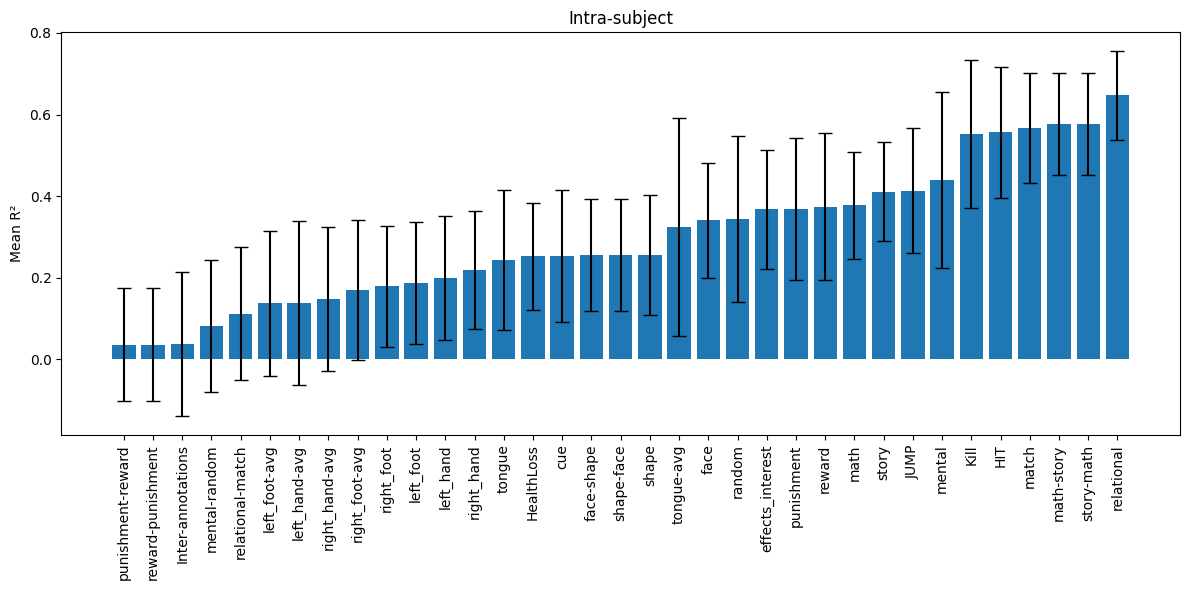

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# The provided data as a string
data_string = """
comparison\tevent\tcount\tmean\tstd\tmin\t25%\t50%\t75%\tmax
inter-subject\tHIT\t793\t0.222689831732607\t0.095038144080665\t-0.00275730086289161\t0.162464446432329\t0.232028185176049\t0.292141215072201\t0.423499772796003
inter-subject\tHealthLoss\t688\t0.0928875383622325\t0.0632994584738287\t-0.0815833621338394\t0.0485823160005865\t0.092300616680666\t0.131136092220672\t0.299593130369472
inter-subject\tInter-annotations\t1464859\t0.0224458192465115\t0.100231429201547\t-0.453363623313505\t-0.0407083881891146\t0.0195113178501449\t0.0823032191559305\t0.549920755409751
inter-subject\tJUMP\t793\t0.181768128985311\t0.0681305518690342\t-0.0314433078530771\t0.130197539261714\t0.183922560366722\t0.235652162292827\t0.364788198632869
inter-subject\tKill\t793\t0.224016148664828\t0.0969182645366078\t-0.0244148003527798\t0.153524126486665\t0.222228600929128\t0.302133139453063\t0.432096766633224
inter-subject\tcue\t1437\t0.123651676787946\t0.0820906416128736\t-0.169657943686292\t0.0682599696116582\t0.123933045740998\t0.177924198736251\t0.353549037802146
inter-subject\teffects_interest\t1437\t0.175771757294408\t0.0989891314197717\t-0.128668722737152\t0.108684756723716\t0.176176378017086\t0.241451575134478\t0.455864064520435
inter-subject\tface\t1390\t0.160477825990204\t0.0880346557410488\t-0.181845305240137\t0.103139953315792\t0.167796827735406\t0.22207207682592\t0.401638044348106
inter-subject\tface-shape\t1390\t0.117552080782398\t0.0909266778746766\t-0.189816995100257\t0.0556110409169396\t0.118567498468892\t0.17997744754265\t0.380313425720729
inter-subject\tleft_foot\t1437\t0.0853359790373769\t0.0792922673538242\t-0.216561441556461\t0.0329008784633235\t0.087645413151596\t0.13739207712523\t0.313112470906286
inter-subject\tleft_foot-avg\t1437\t0.0297410995054741\t0.0856198565799901\t-0.295673232792333\t-0.0274012924389385\t0.0325632881701524\t0.0906800444440303\t0.289431594358325
inter-subject\tleft_hand\t1437\t0.0992947565523873\t0.0918023397071475\t-0.247967305890738\t0.0376707520579188\t0.102345360325582\t0.160775260253706\t0.360186695386317
inter-subject\tleft_hand-avg\t1437\t0.0346630136251867\t0.109193383643825\t-0.287510092283816\t-0.0400098475668753\t0.0390546428671507\t0.113798239178993\t0.337542472969038
inter-subject\tmatch\t1304\t0.328769533418218\t0.0913653354755428\t0.0261297944653635\t0.266359379206679\t0.333843761744262\t0.396412619907105\t0.552192031362703
inter-subject\tmath\t1390\t0.151009701823722\t0.0731381488846758\t-0.111773115612774\t0.104925954924089\t0.15341784062434\t0.200811849256542\t0.35243401058673
inter-subject\tmath-story\t1390\t0.257333603960894\t0.0837808457784498\t-0.192462200392428\t0.209846836406347\t0.265320958211641\t0.315379136501354\t0.453363623313505
inter-subject\tmental\t1261\t0.24681345318192\t0.131272497874502\t-0.202491526761208\t0.185767954235741\t0.265749063719717\t0.335638204340543\t0.500142265077484
inter-subject\tmental-random\t1261\t0.0375967466367385\t0.0895623517609624\t-0.312483986420558\t-0.0210371624126078\t0.0371168149532861\t0.0970640155691621\t0.315133344005554
inter-subject\tpunishment\t1393\t0.181758995869444\t0.0942522671082041\t-0.153675257583733\t0.122050856080045\t0.186255643222066\t0.24494593021895\t0.414361793403622
inter-subject\tpunishment-reward\t1393\t0.0101418601230092\t0.0769219129957443\t-0.221419916304871\t-0.0443003518730847\t0.00947069081109543\t0.0619521599414944\t0.348666602377354
inter-subject\trandom\t1261\t0.176011440451368\t0.118828891727004\t-0.202851618297491\t0.101864155659057\t0.172543260910483\t0.25680318424194\t0.51769260131305
inter-subject\trelational\t1304\t0.373649185709253\t0.0892781353137795\t0.0386318125071109\t0.318693201961665\t0.38345249338393\t0.437626208657668\t0.557627693773298
inter-subject\trelational-match\t1304\t0.027537107935942\t0.0829743679875415\t-0.260391759400377\t-0.0232451412178887\t0.0316355049015227\t0.0807600361520905\t0.300716881909079
inter-subject\treward\t1393\t0.182569461207108\t0.110170860449267\t-0.202824799522906\t0.10654554414285\t0.185115671543779\t0.267882837998222\t0.433264800830559
inter-subject\treward-punishment\t1393\t0.0101418601230092\t0.0769219129957443\t-0.221419916304871\t-0.0443003518730847\t0.00947069081109543\t0.0619521599414944\t0.348666602377354
inter-subject\tright_foot\t1437\t0.0722836219222368\t0.0825602708905987\t-0.212253818442576\t0.0199213558921707\t0.0770555424550669\t0.126656184891421\t0.304875238725041
inter-subject\tright_foot-avg\t1437\t0.0560466601759713\t0.0873958175437523\t-0.274506981085214\t-0.00536776890011457\t0.0577325862034636\t0.118981496870572\t0.29354012895351
inter-subject\tright_hand\t1437\t0.122920114809844\t0.0811707840817039\t-0.213805626629924\t0.0709619860567106\t0.122381881640161\t0.174372336524935\t0.385026149234684
inter-subject\tright_hand-avg\t1437\t0.054058076560665\t0.0985672396465139\t-0.230677249159716\t-0.0130138562041889\t0.0562053045866447\t0.118752573983886\t0.32040052592463
inter-subject\tshape\t1390\t0.101297386565446\t0.0777623459331255\t-0.169677517833123\t0.0479273654244241\t0.10261585382941\t0.155218807825356\t0.3331261981795
inter-subject\tshape-face\t1390\t0.117552080782398\t0.0909266778746766\t-0.189816995100257\t0.0556110409169396\t0.118567498468892\t0.17997744754265\t0.380313425720729
inter-subject\tstory\t1390\t0.224975877607726\t0.0789785019087476\t-0.0328376189994503\t0.171253188742772\t0.231954047279845\t0.283776916705834\t0.413340117237105
inter-subject\tstory-math\t1390\t0.257333603960894\t0.0837808457784498\t-0.192462200392428\t0.209846836406347\t0.265320958211641\t0.315379136501354\t0.453363623313505
inter-subject\ttongue\t1437\t0.099174881519866\t0.0991103767023752\t-0.221682003016964\t0.0277040612387345\t0.104275191419136\t0.171360229304111\t0.371418406203084
inter-subject\ttongue-avg\t1437\t0.113423377977051\t0.167862914482427\t-0.278919382656998\t-0.0408173524220566\t0.138857068085756\t0.263855152032193\t0.428232969318548
intra-subject\tHIT\t242\t0.556825840412285\t0.160094115822077\t-0.00740561459373914\t0.482022837496171\t0.575476610168675\t0.667400372997729\t0.814451201956958
intra-subject\tHealthLoss\t215\t0.252313471081987\t0.130718176977326\t-0.00024535673935581\t0.154847556500104\t0.249986746330553\t0.32812125167651\t0.591368872230992
intra-subject\tInter-annotations\t491417\t0.0370616257980114\t0.176624636335707\t-1\t-0.0703297398309999\t0.0321756440072332\t0.140443731847563\t0.990822817986484
intra-subject\tJUMP\t242\t0.413461596929056\t0.152767199605042\t-0.0536261662418025\t0.320471189947948\t0.438665194650625\t0.529094830489395\t0.682113374075795
intra-subject\tKill\t242\t0.55186455829497\t0.181826581996397\t-0.0413585434890169\t0.406609135893122\t0.601175596787199\t0.688739519876002\t0.827278278929208
intra-subject\tcue\t454\t0.253402527277559\t0.162180885261807\t-0.196390419048435\t0.155877695444378\t0.27302137937135\t0.365870497485648\t0.641603003386481
intra-subject\teffects_interest\t454\t0.367433179464484\t0.146837212375337\t-0.161069770905099\t0.278821824285954\t0.381548548695869\t0.471641257192672\t0.721219658651529
intra-subject\tface\t440\t0.340893932202452\t0.140558006714233\t-0.0368074930314184\t0.235962363003505\t0.349227263212413\t0.449678319793854\t0.649356211997958
intra-subject\tface-shape\t440\t0.255712377036531\t0.137965169859283\t-0.191296138421972\t0.173350652083636\t0.262300847688664\t0.35028512521531\t0.573810286650395
intra-subject\tleft_foot\t454\t0.187465097595401\t0.148810504818419\t-0.237419386163982\t0.0921528839372662\t0.18793288837052\t0.289523788383597\t0.731024687398554
intra-subject\tleft_foot-avg\t454\t0.138190399258106\t0.177697671781327\t-0.555632817673977\t0.0244728219775383\t0.152446563247285\t0.256549962682699\t0.673986005046723
intra-subject\tleft_hand\t454\t0.200015750241236\t0.151666239589407\t-0.254643157517671\t0.0947279762968045\t0.208343942044008\t0.313886700100187\t0.618178679705011
intra-subject\tleft_hand-avg\t454\t0.138745044423474\t0.200580167060612\t-0.538219795309336\t0.0208897921588814\t0.160130321774474\t0.28047190161676\t0.683481726060713
intra-subject\tmatch\t407\t0.566732319037072\t0.134772411668639\t0.00949586044249946\t0.503341464394642\t0.58657864670571\t0.662533997590916\t0.809037840733151
intra-subject\tmath\t440\t0.378038111615419\t0.131199058643893\t-0.100171361805232\t0.301654360336922\t0.390042628204526\t0.475277451448962\t0.680840484775219
intra-subject\tmath-story\t440\t0.576371492625265\t0.124290824838229\t0.108849394886287\t0.493733150286911\t0.590263527159887\t0.663386343609664\t0.830151712422969
intra-subject\tmental\t392\t0.440306864848466\t0.2152746537588\t-0.28004129896312\t0.332738925400016\t0.479240939778149\t0.584891974188173\t0.826394631856817
intra-subject\tmental-random\t392\t0.0824726644404564\t0.162341379385634\t-0.407688533926864\t-0.0212554646162983\t0.0805553218031249\t0.191629076792833\t0.550829824860128
intra-subject\tpunishment\t437\t0.368183638424095\t0.174178455982636\t-0.246412359240773\t0.256938356266271\t0.378958799080966\t0.497849685355979\t0.70116971063132
intra-subject\tpunishment-reward\t437\t0.0355985251687537\t0.138256963999886\t-0.333685024356108\t-0.0630956495279735\t0.0412046713901778\t0.132091794634163\t0.441295139990623
intra-subject\trandom\t392\t0.343620587565548\t0.203108031293767\t-0.320927301456993\t0.212483501681473\t0.358582778501124\t0.471615560499614\t0.82027316421962
intra-subject\trelational\t407\t0.646889028996799\t0.109802757719341\t0.314166082327648\t0.579889836311845\t0.665034360281868\t0.729695673525115\t0.843185727153062
intra-subject\trelational-match\t407\t0.112275447675601\t0.162799693047153\t-0.419100673607544\t0.00505488652385855\t0.131636620261476\t0.231484048942736\t0.494165649551231
intra-subject\treward\t437\t0.374536005844229\t0.179833915583263\t-0.252497274769559\t0.252112882550578\t0.401215683449218\t0.512200210344551\t0.710636413060644
intra-subject\treward-punishment\t437\t0.0355985251687537\t0.138256963999886\t-0.333685024356108\t-0.0630956495279735\t0.0412046713901778\t0.132091794634163\t0.441295139990623
intra-subject\tright_foot\t454\t0.17915231624194\t0.148836929117084\t-0.267565373312996\t0.0949863369416578\t0.183082025336033\t0.276116549917578\t0.615135322511192
intra-subject\tright_foot-avg\t454\t0.169881294767517\t0.171434281977867\t-0.365043560618595\t0.0515045183575682\t0.175251063147015\t0.299706292546559\t0.573479425755169
intra-subject\tright_hand\t454\t0.219021003950044\t0.144479441841237\t-0.273761229364977\t0.136454570854391\t0.215152471690885\t0.314948165018788\t0.58962441750488
intra-subject\tright_hand-avg\t454\t0.148114686113685\t0.177496408330066\t-0.393971541224063\t0.0505866967162737\t0.169323655959575\t0.272994069725893\t0.608851373649208
intra-subject\tshape\t440\t0.256960370960697\t0.147019123215903\t-0.176677805118285\t0.153341120926993\t0.268023616729349\t0.360209431754196\t0.615344049794914
intra-subject\tshape-face\t440\t0.255712377036531\t0.137965169859283\t-0.191296138421972\t0.173350652083636\t0.262300847688664\t0.35028512521531\t0.573810286650395
intra-subject\tstory\t440\t0.41141518671855\t0.121349321410707\t-0.00913972161509343\t0.332448792341705\t0.419806835802569\t0.494446976516808\t0.716539749241199
intra-subject\tstory-math\t440\t0.576371492625265\t0.124290824838229\t0.108849394886287\t0.493733150286911\t0.590263527159887\t0.663386343609664\t0.830151712422969
intra-subject\ttongue\t454\t0.242768329871716\t0.171878467761962\t-0.361225396948412\t0.144483186436708\t0.269077115097609\t0.357705447812112\t0.6218104562664
intra-subject\ttongue-avg\t454\t0.324599785047424\t0.266641051547392\t-0.316017627676108\t0.112696534178834\t0.407324096277268\t0.539432786500213\t0.760005956875583
"""

# Read the data into a DataFrame
df = pd.read_csv(StringIO(data_string), sep='\t')

# Convert numeric columns
numeric_cols = df.columns.drop(['comparison', 'event'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Separate inter-subject and intra-subject data
inter_subject_df = df[df['comparison'] == 'inter-subject']
intra_subject_df = df[df['comparison'] == 'intra-subject']

# Sort by mean
inter_subject_df_sorted = inter_subject_df.sort_values('mean')
intra_subject_df_sorted = intra_subject_df.sort_values('mean')

# Plot inter-subject
plt.figure(figsize=(12, 6))
plt.bar(inter_subject_df_sorted['event'], inter_subject_df_sorted['mean'], yerr=inter_subject_df_sorted['std'], capsize=5)
plt.xticks(rotation=90)
plt.title('Inter-subject')
plt.ylabel('Mean R²')
plt.tight_layout()
plt.show()

# Plot intra-subject
plt.figure(figsize=(12, 6))
plt.bar(intra_subject_df_sorted['event'], intra_subject_df_sorted['mean'], yerr=intra_subject_df_sorted['std'], capsize=5)
plt.xticks(rotation=90)
plt.title('Intra-subject')
plt.ylabel('Mean R²')
plt.tight_layout()
plt.show()
